TASK 1 Learning the logic operators

In [2]:
# Logic Operator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Sigmoid function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

In [4]:
# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
    return x * (1.0 - x)

In [5]:
class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input = x
        self.neuron = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
        self.y = y
        self.output = np.zeros(self.y.shape) # instantiating the output
    def feedforward(self):
          self.layer1 = sigmoid(np.dot(self.input, self.weights1))
          self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
     # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))

        d_weights1 = np.dot(self.input.T,(np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
     # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [6]:
iterations = 2000 # 10 50 100 500 2000
n_unit = 1 # 1 2 5 10
if __name__ == "__main__":

    Input = np.array([[0, 0, 1],   # example
                      [0, 1, 1],
                      [1, 0, 1],
                      [1, 1, 1]])
    Target = np.array([[0], [0], [0], [1]])


    model = NeuralNetwork(Input, Target, n_unit)

    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output) ** 2
        SSD.append(np.sum(errors))  # Objective(loss) function

    Itr = np.linspace(1, len(SSD), len(SSD))

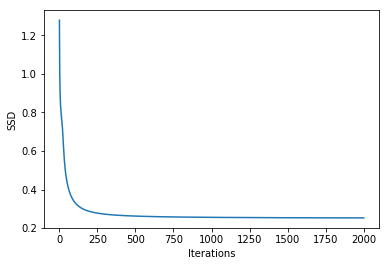

The Weight1 is: [[-6.98985147]
 [-6.98985147]
 [ 7.05040205]]
The Weight2 is: [[-7.72576364]]
The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[4.44271379e-04]
 [1.83519430e-02]
 [1.83519430e-02]
 [4.98110596e-01]]


In [7]:
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    plt.show()

    print("The Weight1 is:", model.weights1)
    print("The Weight2 is:", model.weights2)

    print("The target values are:", Target)
    print("The predicted values are:", model.output)


In [16]:
iterations = 20000 # 10 50 100 500 2000
n_unit = 5 # 1 2 5 10

In [17]:
    Input = np.array([[0, 0],   # XOR
                      [0, 1],
                      [1, 0],
                      [1, 1]])
    Target = np.array([[0], [1], [1], [0]])

    # Input = np.array([[0, 0],   # AND
    #                   [0, 1],
    #                   [1, 0],
    #                   [1, 1]])
    # Target = np.array([[0], [0], [0], [1]])

In [18]:

    model = NeuralNetwork(Input, Target, n_unit)

    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output) ** 2
        SSD.append(np.sum(errors))  # Objective(loss) function

    Itr = np.linspace(1, len(SSD), len(SSD))

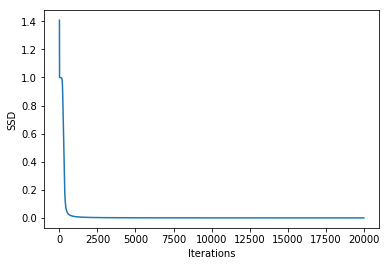

The Weight1 is: [[-2.27408265 -2.34487599  7.73872173  5.68059747 -3.2113279 ]
 [-2.54938106  4.93053261 -3.83343531  5.78800435  6.67189806]]
The Weight2 is: [[ -4.02530578]
 [ -4.53688629]
 [-11.2066805 ]
 [ 17.30842395]
 [ -7.331722  ]]
The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.00742054]
 [0.99260618]
 [0.99324918]
 [0.00645291]]


In [19]:
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    plt.show()

    print("The Weight1 is:", model.weights1)
    print("The Weight2 is:", model.weights2)

    print("The target values are:", Target)
    print("The predicted values are:", model.output)


TENSORFLOW 
Sequential API

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 10
model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer = SGD(lr = 0.01),
metrics=['binary_accuracy'])
model.fit(Input, Target, epochs = 20000, verbose=0)
print("The predicted class labels are:", model.predict(Input))

The predicted class labels are: [[0.13353693]
 [0.9124092 ]
 [0.9126972 ]
 [0.07242104]]
